In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline 

In [4]:
customers = pd.read_csv('Ecommerce Customers')

In [5]:
customers

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


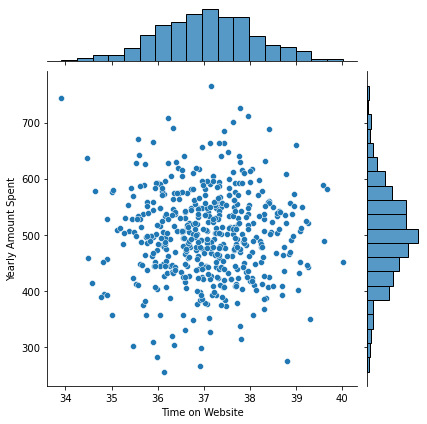

In [6]:
sns.jointplot(data=customers, x='Time on Website',y= 'Yearly Amount Spent')

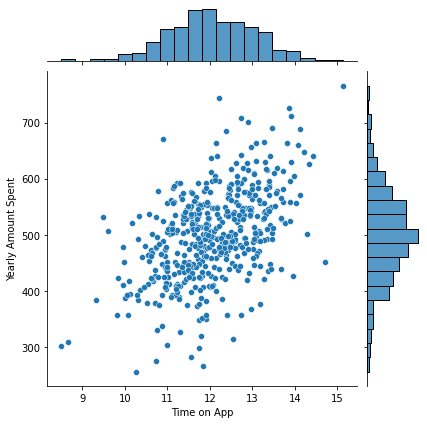

In [7]:
sns.jointplot(data=customers, x='Time on App',y='Yearly Amount Spent' )

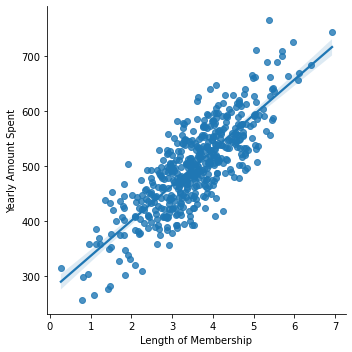

In [8]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [9]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [10]:
y = customers['Yearly Amount Spent']

In [11]:
X = customers[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
lm.fit( X_train,y_train)

LinearRegression()

In [17]:
lm.coef_

array([25.51605911, 38.72442693,  0.63099074, 61.40957523])

In [18]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

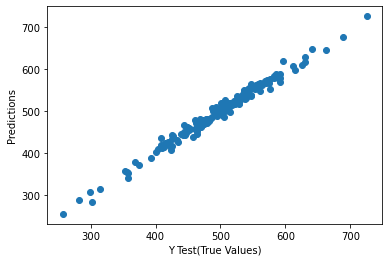

In [19]:
plt.scatter(y_test, prediction)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predictions')

In [20]:
from sklearn import metrics

In [21]:
print('MAE', metrics.mean_absolute_error(y_test,prediction))
print('MSE', metrics.mean_squared_error(y_test,prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 7.831329824180724
MSE 97.27218799148612
RMSE 9.8626663733235


In [22]:
metrics.explained_variance_score(y_test,prediction)

0.9835154221929082

c:\Users\Kareem\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

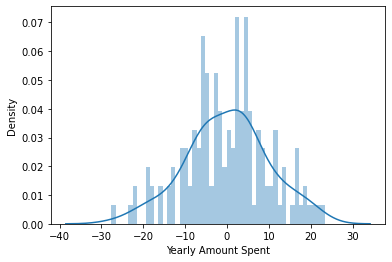

In [23]:
sns.distplot((y_test-prediction),bins=50)

In [24]:
pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,25.516059
Time on App,38.724427
Time on Website,0.630991
Length of Membership,61.409575
